In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Import necessary metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Lab 11

In [ ]:
# a. Load Dataset 'wisconsin_data-02.csv'
# b. Insert a validation data at the end of the dataframe

# data = [[2.68, 23.84, 82.69, 499, 0.1122, 0.1262, 0.1128, 0.06873, 0.1905, 0.0659, 0.4255, 1.178, 2.927, 36.46,	0.007781,
#         0.02648, 0.02973, 0.0129, 0.01635, 0.003601, 17.09, 33.47, 111.8, 888.3, 0.1851, 0.4061, 0.4024, 0.1716, 0.3383, 0.103, 'Unknown'],

#        [3.08, 15.71, 85.63, 520, 0.1075, 0.127, 0.04568, 0.0311, 0.1967, 0.06811, 0.1852, 0.7477, 1.383, 14.67, 0.004097, 0.01898, 0.01698, 0.00649, 0.01678,
#         0.002425, 14.5, 20.49,	96.09, 630.5, 0.1312, 0.2776, 0.189, 0.07283, 0.3184, 0.0818, 'Unknown']]

# c. Use StandardScaler to normalize the dataset
# e. Remove the validation data from the dataset before training
# f. Train/Test Split is test_size = 0.2, random_state = 101

In [ ]:
# a. Load Dataset 'wisconsin_data-02.csv'
dataset = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/wisconsin_data-02.csv', encoding='ISO-8859-1')
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [ ]:
# b. Insert a validation data at the end of the dataframe

validation_data = [
    [2.68, 23.84, 82.69, 499, 0.1122, 0.1262, 0.1128, 0.06873, 0.1905, 0.0659, 0.4255, 1.178, 2.927, 36.46, 0.007781, 0.02648, 0.02973, 0.0129, 0.01635, 0.003601, 17.09, 33.47, 111.8, 888.3, 0.1851, 0.4061, 0.4024, 0.1716, 0.3383, 0.103, 'Unknown'],
    [3.08, 15.71, 85.63, 520, 0.1075, 0.127, 0.04568, 0.0311, 0.1967, 0.06811, 0.1852, 0.7477, 1.383, 14.67, 0.004097, 0.01898, 0.01698, 0.00649, 0.01678, 0.002425, 14.5, 20.49, 96.09, 630.5, 0.1312, 0.2776, 0.189, 0.07283, 0.3184, 0.0818, 'Unknown']
]

validation_df = pd.DataFrame(validation_data, columns=dataset.columns)
df_with_validation = pd.concat([dataset, validation_df], ignore_index=True)

print("\nDataset with validation data inserted (showing tail):")
print(df_with_validation.tail().to_markdown(index=False, numalign="left", stralign="left"))


Dataset with validation data inserted (showing tail):
| radius_mean   | texture_mean   | perimeter_mean   | area_mean   | smoothness_mean   | compactness_mean   | concavity_mean   | concave points_mean   | symmetry_mean   | fractal_dimension_mean   | radius_se   | texture_se   | perimeter_se   | area_se   | smoothness_se   | compactness_se   | concavity_se   | concave points_se   | symmetry_se   | fractal_dimension_se   | radius_worst   | texture_worst   | perimeter_worst   | area_worst   | smoothness_worst   | compactness_worst   | concavity_worst   | concave points_worst   | symmetry_worst   | fractal_dimension_worst   | diagnosis   |
|:--------------|:---------------|:-----------------|:------------|:------------------|:-------------------|:-----------------|:----------------------|:----------------|:-------------------------|:------------|:-------------|:---------------|:----------|:----------------|:-----------------|:---------------|:--------------------|:--------------|:-------

In [ ]:
# c. Use StandardScaler to normalize the dataset
# Separate features (X) and target (y)
# Keep validation rows separate as they have 'Unknown' diagnosis for now
df_to_scale = df_with_validation.iloc[:-2].copy()
X_full = df_to_scale.drop('diagnosis', axis=1)
y_full = df_to_scale['diagnosis']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_full)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_full.columns)

In [ ]:
# d. Remove the validation data from the dataset before training
X_final = X_scaled_df
y_final = y_full

print("\nShape of features after scaling and before split:", X_final.shape)
print("Shape of target after scaling and before split:", y_final.shape)


Shape of features after scaling and before split: (569, 30)
Shape of target after scaling and before split: (569,)


In [ ]:
# e. Train/Test Split is test_size = 0.2, random_state = 101
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=101)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


# Questions

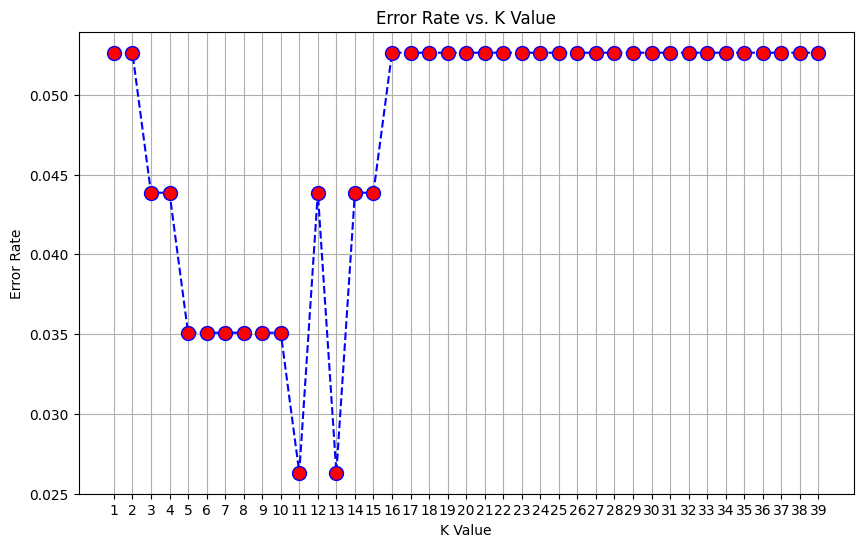


--- Finding Optimized K-value ---
The optimized K-value (where error rate is minimum) is: 11
The accuracy at the optimized K-value (11) is: 0.9737


In [ ]:
### 6. What is the optimized k-value of the model?
### 7. Using the optimized k-value of the model, what is the model's accuracy?

error_rate = []
accuracy_scores = []
k_values = range(1, 40) # Test k values from 1 to 39

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    accuracy_scores.append(accuracy_score(y_test, pred_i))

# Plotting the error rate to find the optimal K
plt.figure(figsize=(10,6))
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the K with the lowest error rate (or highest accuracy)
min_error = min(error_rate)
optimal_k_index = error_rate.index(min_error)
optimized_k = k_values[optimal_k_index]
optimized_accuracy = accuracy_scores[optimal_k_index]

print(f"\n--- Finding Optimized K-value ---")
print(f"The optimized K-value (where error rate is minimum) is: {optimized_k}")
print(f"The accuracy at the optimized K-value ({optimized_k}) is: {optimized_accuracy:.4f}")

# Train the KNN model with the optimized K-value
knn_optimized = KNeighborsClassifier(n_neighbors=optimized_k)
knn_optimized.fit(X_train, y_train)
predictions_optimized = knn_optimized.predict(X_test)

In [ ]:
### 8. What is the True Positive value based on the Confusion matrix of your chosen optimized model?

# Display Classification Report for the optimized model
print(f"\n--- Classification Report for Optimized KNN (k={optimized_k}) ---")
print(classification_report(y_test, predictions_optimized))

cm = confusion_matrix(y_test, predictions_optimized, labels=['B', 'M'])
print(f"\n--- Confusion Matrix for Optimized KNN (k={optimized_k}) ---")
print(pd.DataFrame(cm, index=['Actual B', 'Actual M'], columns=['Predicted B', 'Predicted M']).to_markdown())

# Assuming 'M' (Malignant) is the positive class
true_positive = cm[1, 1]
print(f"\nTrue Positive (TP) value based on the Confusion Matrix (assuming 'M' is positive): {true_positive}")


--- Classification Report for Optimized KNN (k=11) ---
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


--- Confusion Matrix for Optimized KNN (k=11) ---
|          |   Predicted B |   Predicted M |
|:---------|--------------:|--------------:|
| Actual B |            71 |             1 |
| Actual M |             2 |            40 |

True Positive (TP) value based on the Confusion Matrix (assuming 'M' is positive): 40


In [ ]:
### 9. What is the prediction for validation data number 1? Malignant (M) or Benign (B)?
### 10. What is the prediction for validation data number 2? Malignant (M) or Benign (B)?

# Extract the raw validation data points (features only)
validation_data_to_predict_raw_features = np.array([
    validation_data[0][:-1],
    validation_data[1][:-1]
])

# Scale the validation data using the same scaler fitted on the training data
scaled_validation_data_for_prediction = scaler.transform(validation_data_to_predict_raw_features)

# Make predictions using the optimized KNN model
validation_predictions = knn_optimized.predict(scaled_validation_data_for_prediction)

print("\n--- Predictions on Validation Data ---")
print(f"9. Prediction for validation data number 1: {validation_predictions[0]} (Malignant (M) or Benign (B)?)")
print(f"10. Prediction for validation data number 2: {validation_predictions[1]} (Malignant (M) or Benign (B)?)")


--- Predictions on Validation Data ---
9. Prediction for validation data number 1: M (Malignant (M) or Benign (B)?)
10. Prediction for validation data number 2: B (Malignant (M) or Benign (B)?)
